### 시가 생선 계산 서비스 구현

- 주요 학습 : 지도학습 -> 회귀
- 세부 학습 : 선형회귀(LinearRegression)
    * 이유 : 데이터의 분포가 선형관계임

### [1] 데이터 준비 및 확인

In [1]:
filename='../../data/fish.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#  74번~ 129번 => perch 농어 데이터
fishDF=pd.read_csv(filename,
                    header=None, 
                    skiprows=73, 
                    skipfooter=31,
                    usecols=[1, 2],     # 1 - Weight, 2 - Length
                    engine='python')   # skipfooter 매개변수 사용 시 지정

In [4]:
fishDF.columns=['Weight','Length' ]

In [5]:
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [6]:
fishDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


### [2] 데이터 분석

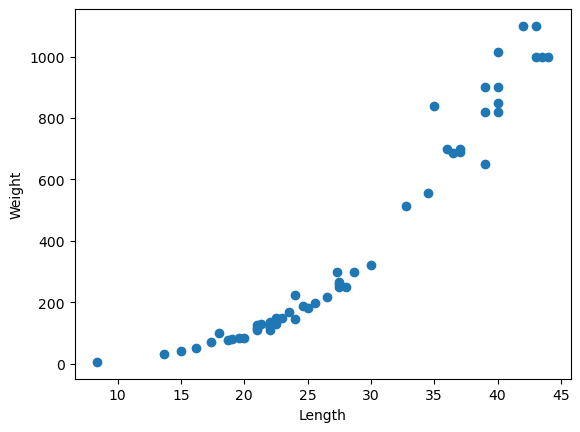

In [7]:
# 시각화해서 확인 
import matplotlib.pyplot as plt

# 수치 데이터의 관계 그래프 => 산점도(scatter)
plt.scatter(fishDF.Length, fishDF.Weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [8]:
# 상관계수 수치과
fishDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


### [3]  데이터 가공

- [3-1] 특성/피쳐 데이터와 타겟 데이터 분리

In [9]:
# 학습 진행 ==> fit(2D, 1D)
# 학습 진행 후 ==> 모델파라미터(Model Parameter) : 기울기/가중치와 절편
# 학습에 사용할 특성 테이터 => 2D
featureDF=fishDF.Length.to_frame()

# 학습에 사용할 타겟 데이터 => 1D
targetDF=fishDF.Weight.copy()

In [10]:
featureDF.head(2), featureDF.index

(   Length
 0     8.4
 1    13.7,
 RangeIndex(start=0, stop=56, step=1))

In [11]:
targetDF.head(2)

0     5.9
1    32.0
Name: Weight, dtype: float64

- [3-2] 훈련용/테스트용 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 기본 : 훈련:테스트 = 75% 25%
# 반환값 : 튜플 형태,  훈련데이터셋과 테스트데이터셋
train_X, test_X, train_y, test_y=train_test_split(  featureDF, 
                                                    targetDF,
                                                    random_state=42)

In [14]:
print(f'train_X :{len(train_X)}개, {train_X.ndim}차원, {train_X.shape}')
print(f'test_X :{len(test_X)}개, {test_X.ndim}차원, {test_X.shape}')

train_X :42개, 2차원, (42, 1)
test_X :14개, 2차원, (14, 1)


### [4] 학습  => 학습방법 즉 문제해결 방법 변경
#### 선형회귀
- 최대한 많은 데이터를 만족하는 선형회귀식을 생성함
    * 방법 : 제공된 데이터와 타겟을 기준으로 선형회귀식을 생성

In [15]:
# 객체 생성 
reg = LinearRegression()

In [16]:
# fit()==> 학습
reg.fit(train_X, train_y)

LinearRegression()

In [17]:
# 학습 후 결정된 파라미터 즉 모델파라미터 확인
f'기울기/가중치 : {reg.coef_}'

'기울기/가중치 : [39.01714496]'

In [18]:
f'절편/바이어스 : {reg.intercept_}'

'절편/바이어스 : -709.0186449535477'

### [5] 평가

In [19]:
train_score = reg.score(train_X, train_y)
test_score =reg.score(test_X, test_y)

In [20]:
print(f'훈  련 결과 점수 : {train_score}' )
print(f'테스트 결과 점수 : {test_score}' )

훈  련 결과 점수 : 0.9398463339976041
테스트 결과 점수 : 0.8247503123313559


### [4] 예측

In [21]:
new_data_=pd.DataFrame([[39.2], [12.7]], columns=['Length'])

pre_y = reg.predict(new_data_)
pre_y.shape

(2,)

In [22]:
pre_y

array([ 820.45343762, -213.50090392])

- 시각화 => 회귀선

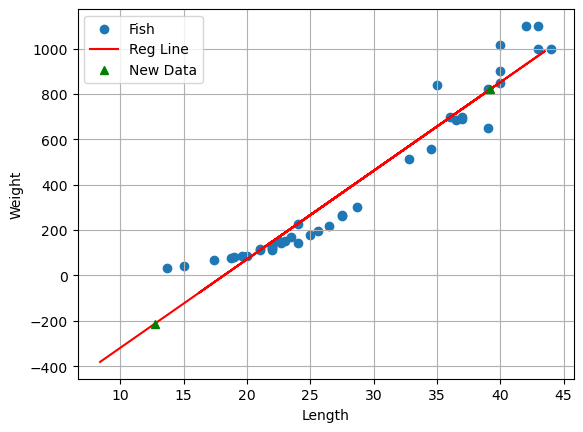

In [23]:
import matplotlib.pyplot as plt

# 수치 데이터의 관계 그래프 => 산점도(scatter)
plt.scatter(train_X, train_y, label='Fish')

# 선형회귀에서 구한 y=ax+b 공식의 직선 긋기
plt.plot(test_X,reg.predict(test_X), 'r-', label='Reg Line')

plt.plot(new_data_, pre_y, '^g', label='New Data')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()

###  다항회귀 => Polynorminal

- 기존에 가진 특성으로 조합해서 새로운 특성 추가하기
- 사용 클래스 : PolynomialFeatures

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# 특성 생성 객체 생성
poly=PolynomialFeatures(degree=2)

# 현재 3개 특성 가진 데이터 전달해서 2차원 형태의 특성 생성
# (1) 입력 받은 데이터의 특성이 몇개 존재하는지 파악
poly.fit(train_X)

# (2) 존재하는 특성을 활용해서 새로운 특성 생성
poly_train=poly.transform(train_X)
poly_test=poly.transform(test_X)

In [26]:
# 특성 확인
print(f'train_X : {train_X.shape}  poly_train : {poly_train.shape}')
print(f'test_X  : {test_X.shape}   poly_test  : {poly_test.shape}')

print(f'feature name  : {poly.get_feature_names_out()}')

train_X : (42, 1)  poly_train : (42, 3)
test_X  : (14, 1)   poly_test  : (14, 3)
feature name  : ['1' 'Length' 'Length^2']


In [27]:
poly_train[:2]

array([[  1.  ,  19.6 , 384.16],
       [  1.  ,  22.  , 484.  ]])

In [29]:
# 모델 객체 생성
regModel2=LinearRegression()

# 학습
regModel2.fit(poly_train, train_y)

# 모델 파라미터 확인
print(f'기울기 계수 : {regModel2.coef_.shape}, {regModel2.coef_}')     
print(f'절편   계수 : {regModel2.intercept_}')

기울기 계수 : (3,), [  0.         -21.55792498   1.01433211]
절편   계수 : 116.05021078278179


In [31]:
# 성능평가 
train_score = regModel2.score(poly_train, train_y)
test_score  = regModel2.score(poly_test, test_y)

print(f'훈련 성능 : {train_score}, 테스트 성능 : {test_score}') 

훈련 성능 : 0.9706807451768623, 테스트 성능 : 0.977593510832512


- 다항 회귀식 
    * 2차 다항식 경우 => $y=W_1x^2_1 + W_2x_2 + W_3x_3 + b $ 
    * n차 다항식 경우 => $y=W_1x^n_1 + W_2x^n-1_2 + ... + b $ 

In [32]:
x=np.linspace(6,45)
y=(1*regModel2.coef_[0]) + \
   (x * regModel2.coef_[1]) + \
   ((x**2)*regModel2.coef_[2]) + regModel2.intercept_

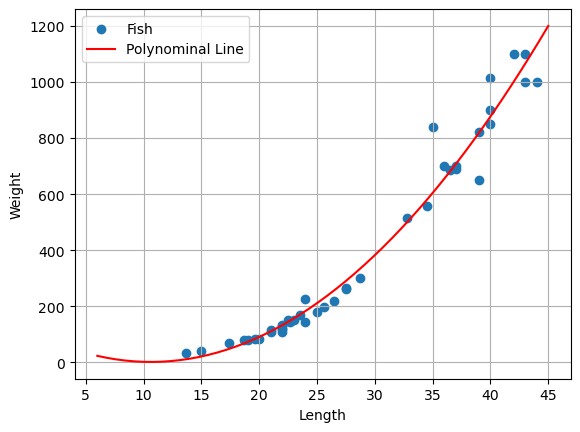

In [33]:
import matplotlib.pyplot as plt

# 수치 데이터의 관계 그래프 => 산점도(scatter)
plt.scatter(train_X, train_y, label='Fish')

# 선형회귀에서 구한 y=ax+b 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Polynominal Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()